<a href="https://colab.research.google.com/github/yoon777/cv_project/blob/main/data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-kor
!pip install pytesseract
!pip install pypdf
!pip install camelot-py[base]

In [4]:
!pip uninstall camelot-py
!pip uninstall camelot

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pytesseract
import pypdf
from PIL import Image
import camelot

ImportError: cannot import name 'TableList' from 'camelot.core' (C:\Users\Yoon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\camelot\core\__init__.py)

In [ ]:
# 구글 드라이브
# from google.colab import drive
# drive.mount('/content/drive')
# image_dir = '/content/drive/MyDrive/CV_project/train_raw'

In [9]:
# vscode
image_dir = 'C:/Users/Yoon/Yoon/2024/BITAMIN/2nd_session/CV_project/032.표_이미지-텍스트_쌍_데이터/조합표/train_raw'

6066
C:/Users/Yoon/Yoon/2024/BITAMIN/2nd_session/CV_project/032.표_이미지-텍스트_쌍_데이터/조합표/train_raw\T02_C01_50000_1253_13.jpg


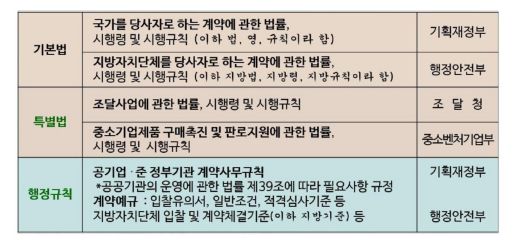

In [10]:
# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.startswith('T02_C01') and f.endswith('.jpg')]

print(len(image_files))

# 첫 번째 이미지 불러오기
first_image_path = os.path.join(image_dir, image_files[0])
print(first_image_path)
image = Image.open(first_image_path)

# 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

In [17]:
# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.startswith('T02_C01') and f.endswith('.jpg')]

# 이미지 크기 정보를 저장할 리스트
widths = []
heights = []

# 이미지 개수
total_images = len(image_files)

# 이미지 크기 비교 및 업데이트
for i, image_file in enumerate(tqdm(image_files)):
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)

    height, width = img.size

    widths.append(width)
    heights.append(height)

100%|██████████| 6066/6066 [00:04<00:00, 1296.43it/s]


In [24]:
import easyocr
import pandas as pd

for i, image_file in enumerate(tqdm(image_files)):
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)

# OCR 모델 초기화 (한국어 및 영어 지원)
reader = easyocr.Reader(['ko', 'en'])

# 이미지에서 텍스트 및 좌표 추출
results = reader.readtext(img)

# 좌표와 텍스트를 데이터프레임으로 변환
data = []
grid = []
for (bbox, text, confidence) in results:
    # bbox는 좌표 정보, text는 인식된 텍스트
    (top_left, top_right, bottom_right, bottom_left) = bbox
    xmin = min(top_left[0], bottom_left[0])
    xmax = max(top_right[0], bottom_right[0])
    ymin = min(top_left[1], top_right[1])
    ymax = max(bottom_left[1], bottom_right[1])
    
    # 좌표와 텍스트 정보를 저장
    data.append(text)
    grid.append({
        'xmin': xmin,
        'xmax': xmax,
        'ymin': ymin,
        'ymax': ymax
    })

df = pd.DataFrame(data)
print(df)

100%|██████████| 6066/6066 [00:01<00:00, 6062.90it/s]
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


                                   0
0                             농어촌특별세
1              지방 세과세대상에   부과  및 감면에
2                       부과되므로   지방세로
3                                 이양
4                             (지방세분)
5                     부동산   취득   보유,
6                               처분까지
7                               세원관리
8                               일원화로
9                           부동산   세정
10                                효율
11                             양도소득세
12                            성   향상
13                        (부동산   관련)
14       소득과세로서   지방세의   재산과세 비중  완화
15  취늑세   재산세와   연계하여   장수울   제고  가능
16  개별소비세   대상  중  지역성이   강한   특정장소의
17                       입장행위와   특정유
18                            흥음식행위에
19                        대하여   지방이양
20                            개별소비 세
21                       과세대상이   지역에
22                   정착되어   있기   때문에
23                               지방세
24                         보편성 . 정착성
25                                 원
2

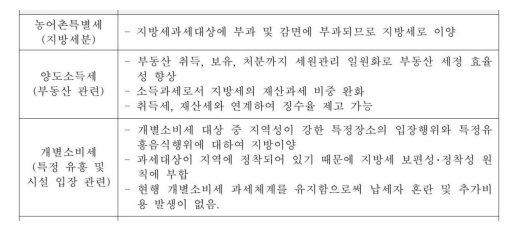

In [21]:
# 이미지 출력
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

In [41]:
from PIL import Image
import io

# 이미지 파일 열기
image = Image.open(image_path)

# BytesIO 객체 생성
pdf_bytes = io.BytesIO()

# PDF로 저장 (메모리 내)
img_pdf = image.save(pdf_bytes, 'PDF', resolution=100.0)
img_pdf

# 메모리에서 PDF 파일 읽기
pdf_bytes.seek(0)  # 포인터를 처음으로 이동

# BytesIO 객체의 내용을 파일로 저장
with open('temp.pdf', 'wb') as f:
    f.write(pdf_bytes.getvalue())

# Camelot으로 PDF에서 테이블 읽기
tables = camelot.read_pdf('temp.pdf')

# 읽은 테이블 출력
for table in tables:
    print(table.df)  # 각 테이블을 데이터프레임 형식으로 출력

AttributeError: module 'camelot' has no attribute 'read_pdf'